In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
#Load datafiniti hotel reviews dataset
dataset = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
dataset

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,...,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",A

In [119]:
# Take data columns hotel_id, review_username, and reviews_rating and sorting it by username
user_rating = pd.DataFrame(dataset, columns=['id', 'reviews.username', 'reviews.rating'])
user_rating

,id,reviews.username,reviews.rating
0,AWE2FvX5RxPSIh2RscTK,tatsurok2018,3
1,AVwcj_OhkufWRAb5wi9T,STEPHEN N,4
2,AVwcj_OhkufWRAb5wi9T,15Deborah,3
3,AVwcj_OhkufWRAb5wi9T,Wilfredo M,5
4,AVwcj_OhkufWRAb5wi9T,Luc D,2
...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,Tiffany1017,4
9996,AVwdatg0ByjofQCxo5S5,bobg187,5
9997,AVwdatg0ByjofQCxo5S5,K261ANbrendah,5
9998,AV1thTgM3-Khe5l_OvT5,soccerrocks2016,5


In [120]:
# Drop duplicate data id_hotel based on user_rating data
hotel_unique = user_rating.drop_duplicates(subset=['id'], keep='first')
hotel_unique

,id,reviews.username,reviews.rating
0,AWE2FvX5RxPSIh2RscTK,tatsurok2018,3
1,AVwcj_OhkufWRAb5wi9T,STEPHEN N,4
5,AVweLARAByjofQCxv5vX,LKDiScenza,4
7,AV1thAoL3-Khe5l_Ott5,madaramapquest,1
8,AVz6h4Sb3D1zeR_xDHsu,IUMIKECOO,5
...,...,...,...
9989,AVweVLmx_7pvs4fzCDKY,fbodie2262,5
9992,AWCPRUBCRxPSIh2RpqUY,josephlL1691HG,5
9993,AVwdatg0ByjofQCxo5S5,Lynn W,5
9998,AV1thTgM3-Khe5l_OvT5,soccerrocks2016,5


In [121]:
# Take only id_hotel
hotel_unique_id = hotel_unique['id']
hotel_unique_id

0       AWE2FvX5RxPSIh2RscTK
1       AVwcj_OhkufWRAb5wi9T
5       AVweLARAByjofQCxv5vX
7       AV1thAoL3-Khe5l_Ott5
8       AVz6h4Sb3D1zeR_xDHsu
                ...         
9989    AVweVLmx_7pvs4fzCDKY
9992    AWCPRUBCRxPSIh2RpqUY
9993    AVwdatg0ByjofQCxo5S5
9998    AV1thTgM3-Khe5l_OvT5
9999    AV1tg9C7a4HuVbed8XA5
Name: id, Length: 1433, dtype: object

In [122]:
# Drop duplicate reviews_username based on user_rating data
user_unique = user_rating.drop_duplicates(subset=['reviews.username'], keep='first')
user_unique

,id,reviews.username,reviews.rating
0,AWE2FvX5RxPSIh2RscTK,tatsurok2018,3
1,AVwcj_OhkufWRAb5wi9T,STEPHEN N,4
2,AVwcj_OhkufWRAb5wi9T,15Deborah,3
3,AVwcj_OhkufWRAb5wi9T,Wilfredo M,5
4,AVwcj_OhkufWRAb5wi9T,Luc D,2
...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,Tiffany1017,4
9996,AVwdatg0ByjofQCxo5S5,bobg187,5
9997,AVwdatg0ByjofQCxo5S5,K261ANbrendah,5
9998,AV1thTgM3-Khe5l_OvT5,soccerrocks2016,5


In [123]:
# Take only review_user_unique_data
user_unique_data = pd.DataFrame(user_unique, columns=['reviews.username', 'reviews.rating'])
user_unique_data

,reviews.username,reviews.rating
0,tatsurok2018,3
1,STEPHEN N,4
2,15Deborah,3
3,Wilfredo M,5
4,Luc D,2
...,...,...
9995,Tiffany1017,4
9996,bobg187,5
9997,K261ANbrendah,5
9998,soccerrocks2016,5


In [124]:
# Step - 2

In [125]:
# Calculate count of review for each hotel
hotel_unique_total_reviews = pd.DataFrame(user_rating.groupby(['id'])['reviews.rating'].count())
hotel_unique_total_reviews

,reviews.rating
id,
AV--lQdFRxPSIh2RmtbT,69
AV--lmxKIxWefVJwsReI,1
AV--luVA3-Khe5l_ZMEJ,1
AV-AN728a4HuVbedGQnJ,90
AV-Cilg2a4HuVbedGQqK,6
...,...
AWdgUTtXa4HuVbedaODu,1
AWdlE0rK3-Khe5l_tDlq,36
AWfPeemaa4HuVbeddb2K,66


In [126]:
# Calculate Sum of Rating for each Hotel
sum_reviews_each_hotel = pd.DataFrame(user_rating.groupby(['id'])['reviews.rating'].sum())
sum_reviews_each_hotel

,reviews.rating
id,
AV--lQdFRxPSIh2RmtbT,261
AV--lmxKIxWefVJwsReI,5
AV--luVA3-Khe5l_ZMEJ,5
AV-AN728a4HuVbedGQnJ,370
AV-Cilg2a4HuVbedGQqK,26
...,...
AWdgUTtXa4HuVbedaODu,4
AWdlE0rK3-Khe5l_tDlq,139
AWfPeemaa4HuVbeddb2K,257


In [127]:
# Sort user_rating data based on hotel_id
sort_hotel_unique = hotel_unique.sort_values('id')
sort_hotel_unique

,id,reviews.username,reviews.rating
6086,AV--lQdFRxPSIh2RmtbT,Jan K,5
1552,AV--lmxKIxWefVJwsReI,foodies311,5
3220,AV--luVA3-Khe5l_ZMEJ,Bill B,5
5627,AV-AN728a4HuVbedGQnJ,biztravel997,4
8337,AV-Cilg2a4HuVbedGQqK,Charles S,4
...,...,...,...
1657,AWdgUTtXa4HuVbedaODu,jackehill,4
1740,AWdlE0rK3-Khe5l_tDlq,NW_Raven,3
6616,AWfPeemaa4HuVbeddb2K,Travelcharlene,2
1919,AWfaJjQba4HuVbeddiSW,94tammyv,5


In [128]:
# Assign new column for each hotel
id_hotel = sort_hotel_unique['id'].values
count_review_hotel = hotel_unique_total_reviews['reviews.rating'].values
sum_review_hotel = sum_reviews_each_hotel['reviews.rating'].values

average_review_hotel = sum_review_hotel / count_review_hotel

hotel = {
    'hotel_id':id_hotel,
    'count_reviews':count_review_hotel,
    'sum_reviews':sum_review_hotel,
    'average_reviews':average_review_hotel
}

new_data_hotel = pd.DataFrame(hotel)
new_data_hotel

,hotel_id,count_reviews,sum_reviews,average_reviews
0,AV--lQdFRxPSIh2RmtbT,69,261,3.782609
1,AV--lmxKIxWefVJwsReI,1,5,5.000000
2,AV--luVA3-Khe5l_ZMEJ,1,5,5.000000
3,AV-AN728a4HuVbedGQnJ,90,370,4.111111
4,AV-Cilg2a4HuVbedGQqK,6,26,4.333333
...,...,...,...,...
1428,AWdgUTtXa4HuVbedaODu,1,4,4.000000
1429,AWdlE0rK3-Khe5l_tDlq,36,139,3.861111
1430,AWfPeemaa4HuVbeddb2K,66,257,3.893939
1431,AWfaJjQba4HuVbeddiSW,2,10,5.000000


In [129]:
# Step - 3

In [130]:
# Calculate count of reviews for each user
user_unique_total_reviews = pd.DataFrame(user_rating.groupby(['reviews.username'])['reviews.rating'].count())
user_unique_total_reviews

,reviews.rating
reviews.username,
#1Cubsfan,1
007traveler64,1
0413beanie,1
059DebDeb056,1
09LCM,2
...,...
zlbenites,1
zonie0531,1
zztravelerzz,1


In [131]:
# Calculate sum of reviews for each user
sum_reviews_each_user = pd.DataFrame(user_rating.groupby(['reviews.username'])['reviews.rating'].sum())
sum_reviews_each_user

,reviews.rating
reviews.username,
#1Cubsfan,4
007traveler64,5
0413beanie,2
059DebDeb056,5
09LCM,8
...,...
zlbenites,5
zonie0531,3
zztravelerzz,4


In [132]:
# Sort user_unique_data data based on reviews.username
sort_user_unique_data = user_unique_data.sort_values('reviews.username')
sort_user_unique_data

,reviews.username,reviews.rating
4954,#1Cubsfan,4
6033,007traveler64,5
3211,0413beanie,2
5360,059DebDeb056,5
7837,09LCM,4
...,...,...
9870,zlbenites,5
317,zonie0531,3
5767,zztravelerzz,4
3196,zzzbill,4


In [133]:
# Assign new column for each user
username = sort_user_unique_data['reviews.username'].values
count_review_user = user_unique_total_reviews['reviews.rating'].values
sum_review_user = sum_reviews_each_user['reviews.rating'].values

average_review_user = sum_review_user / count_review_user

user_reviews = {
    'username':username,
    'count_reviews':count_review_user,
    'sum_reviews':sum_review_user,
    'average_reviews':average_review_user
}

new_data_user = pd.DataFrame(user_reviews)
new_data_user

,username,count_reviews,sum_reviews,average_reviews
0,#1Cubsfan,1,4,4.0
1,007traveler64,1,5,5.0
2,0413beanie,1,2,2.0
3,059DebDeb056,1,5,5.0
4,09LCM,2,8,4.0
...,...,...,...,...
9217,zlbenites,1,5,5.0
9218,zonie0531,1,3,3.0
9219,zztravelerzz,1,4,4.0
9220,zzzbill,1,4,4.0


In [135]:
# Group by data by each rating to visualize data
group_by_rating = pd.DataFrame(user_rating.groupby(['reviews.rating'])['reviews.username'].count())
group_by_rating

,reviews.username
reviews.rating,
1,567
2,554
3,1190
4,2849
5,4840


<Figure size 432x288 with 0 Axes>

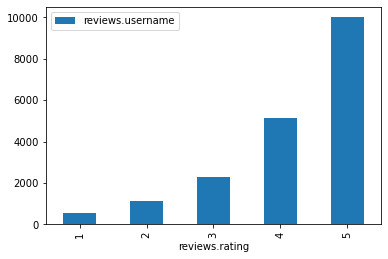

In [152]:
dd = group_by_rating.cumsum()
plt.figure()
dd.plot.bar()

In [155]:
visualize_hotel = pd.DataFrame(new_data_hotel, columns=['average_reviews'])
visualize_hotel

,average_reviews
0,3.782609
1,5.000000
2,5.000000
3,4.111111
4,4.333333
...,...
1428,4.000000
1429,3.861111
1430,3.893939
1431,5.000000


<Figure size 432x288 with 0 Axes>

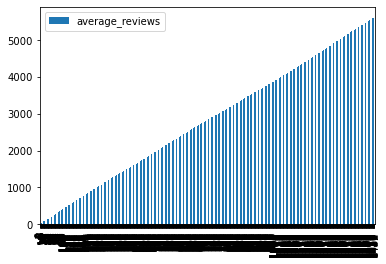

In [156]:
cc = visualize_hotel.cumsum()
plt.figure()
cc.plot.bar()